In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing # preprocess target to make categorical
from sklearn import utils # Lets you read the class of the data
from sklearn.neighbors import KNeighborsClassifier #knn classification model


# This allows all output to be seen instead of just the last item outputted
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
# read in data
my_file_path = "Data/week_2_data/ds5.csv"
ds5 = pd.read_csv(my_file_path)

''' Z column will be used as the predictor, but currently its not categorical the below lines of code
    takes care of that.
''' 
ds5.z
utils.multiclass.type_of_target(ds5.z) # shows type of data in this case continuous

# transform double type data into categorical integer values
# Or as scikit likes to put it from continous values to multiclass
label_encoder = preprocessing.LabelEncoder()
encoded_target = label_encoder.fit_transform(ds5.z)
encoded_target
utils.multiclass.type_of_target(encoded_target) # shows type of data in this case multiclass

' Z column will be used as the predictor, but currently its not categorical the below lines of code\n    takes care of that.\n'

0      1.000000
1      1.004004
2      1.008008
3      1.012012
4      1.016016
5      1.020020
6      1.024024
7      1.028028
8      1.032032
9      1.036036
10     1.040040
11     1.044044
12     1.048048
13     1.052052
14     1.056056
15     1.060060
16     1.064064
17     1.068068
18     1.072072
19     1.076076
20     1.080080
21     1.084084
22     1.088088
23     1.092092
24     1.096096
25     1.100100
26     1.104104
27     1.108108
28     1.112112
29     1.116116
         ...   
970    4.883884
971    4.887888
972    4.891892
973    4.895896
974    4.899900
975    4.903904
976    4.907908
977    4.911912
978    4.915916
979    4.919920
980    4.923924
981    4.927928
982    4.931932
983    4.935936
984    4.939940
985    4.943944
986    4.947948
987    4.951952
988    4.955956
989    4.959960
990    4.963964
991    4.967968
992    4.971972
993    4.975976
994    4.979980
995    4.983984
996    4.987988
997    4.991992
998    4.995996
999    5.000000
Name: z, Length: 1000, d

'continuous'

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

'multiclass'

In [3]:
# The knn model needs data that it trains on to be in a specific format.

# Before
ds5.iloc[:,1:3] # training data selected by index

# Transformation
combined_data=(np.array(ds5.iloc[:,1:3].values.tolist()))

# After
combined_data

# Model creation and fit 
# I don't remember where the 30 choice came from, but you can play around with this number
n_nearest_neighbors = 30
model = KNeighborsClassifier(n_nearest_neighbors)
model.fit(combined_data, encoded_target)


,y,x
0,0.208787,3.894432
1,-2.714792,3.170172
2,14.975975,10.801399
3,-0.866682,3.801888
4,-0.023717,3.228523
5,9.396334,8.542597
6,-2.798931,2.421957
7,6.188642,6.587546
8,-3.712526,2.118407
9,7.073914,6.999258


array([[ 0.20878725,  3.89443159],
       [-2.7147923 ,  3.17017224],
       [14.97597511, 10.80139925],
       ...,
       [-0.51601507, 18.64098664],
       [ 7.48325915, 22.73081755],
       [10.53496904, 24.23993218]])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

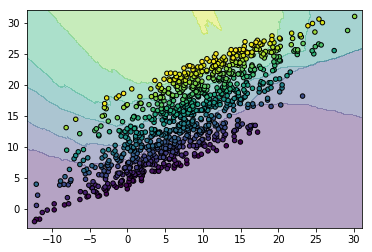

In [4]:
# Renaming the training data label to work with the plotting code
X = combined_data

# Below code came from this example on scikit learns page 
#   http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

#f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
fig = plt.figure()
ax1 = fig.add_subplot(111)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax1.contourf(xx, yy, Z, alpha=0.4)
ax1.scatter(X[:, 0], X[:, 1],s=20, c=encoded_target, edgecolor='k')

